# Question 1A

## Import Packages

In [1]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import Dataset
import torch
import torch.nn as nn # for efficientNet
import torch.optim as optim # for efficientNet
import timm # for efficientNet
import time
import random
import os
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Specify Transforms

In [2]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(scale=(0.6, 1.0), size=(112,112)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

eval_transforms = transforms.Compose([
    transforms.Resize(size=(112,112)),
    transforms.ToTensor()
])



## Load in Dataset

The code is initally loaded using the ImageFolder Class, which replaces the dataset class. This class requires the root folder (in this case the seg_train folder) and creates classes based on the name of the folder. The transforms can also be applied here. Current transforms are from lab 4.

In [3]:
train_dataset = ImageFolder(root='datasets/Intel_Classification_Dataset/seg_train',transform=train_transforms)
print("Train: {} examples".format(len(train_dataset)))

eval_dataset= ImageFolder(root='datasets/Intel_Classification_Dataset/seg_test',transform=eval_transforms)
print("Eval: {} examples".format(len(eval_dataset)))



Train: 14034 examples
Eval: 3000 examples


Once passed into the class, the dataset can be passed using the dataloader class like previously. The current batch size is from lab 4.

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
eval_loader=torch.utils.data.DataLoader(dataset=eval_dataset, batch_size=len(eval_dataset), shuffle=True)
print("Train: {} batches".format(len(train_loader)))
print("Valid: {} batches".format(len(eval_loader))) 

Train: 220 batches
Valid: 1 batches


## Show 10 random Images to verify labels

The code gets the class names by randomly picking 10 images to display.

### Training Dataset

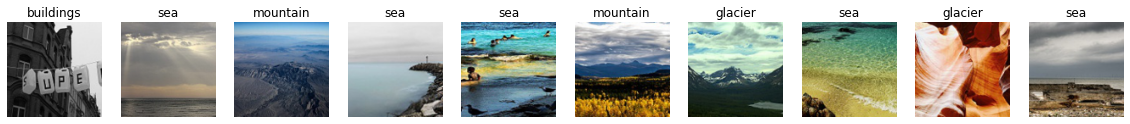

In [5]:
# Get the class names
class_names = train_dataset.classes

# Shuffle the indices of the dataset
indices = list(range(len(train_dataset)))
random.shuffle(indices)

# Define the number of images to show
num_images = 10

# Create a figure and axis objects using matplotlib
fig, axs = plt.subplots(1, num_images, figsize=(20, 20))

# Loop over the random indices and plot the images
for i in range(num_images):
    index = indices[i]
    img, label = train_dataset[index]
    img = img.permute(1, 2, 0)
    axs[i].imshow(img)
    axs[i].set_title(class_names[label])
    axs[i].axis("off")

# Show the plot
plt.show()


### Evaluation Dataset

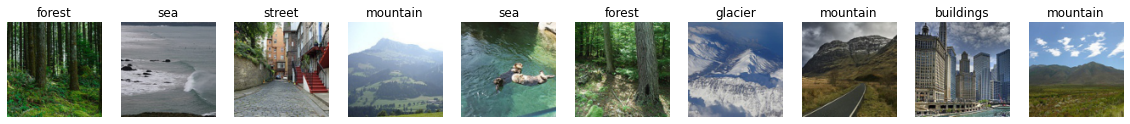

In [6]:
# Get the class names
class_names = eval_dataset.classes

# Shuffle the indices of the dataset
indices = list(range(len(eval_dataset)))
random.shuffle(indices)

# Define the number of images to show
num_images = 10

# Create a figure and axis objects using matplotlib
fig, axs = plt.subplots(1, num_images, figsize=(20, 20))

# Loop over the random indices and plot the images
for i in range(num_images):
    index = indices[i]
    img, label = eval_dataset[index]
    img = img.permute(1, 2, 0)
    axs[i].imshow(img)
    axs[i].set_title(class_names[label])
    axs[i].axis("off")

# Show the plot
plt.show()


### Load pre-existing EfficientNet-B0 Model from the timm library

#### Define parameters

In [7]:
num_classes = 6
num_epochs = 10
learning_rate = 0.001
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


#### Create model, define classifier

In [8]:
model = timm.create_model('efficientnet_b0', pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, num_classes)
model = model.to(device)


#### Define and create loss function and optimizer

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


#### Actually train the model and get the training accuracy and the training loss.

Epoch 1/10 - Training loss: 0.2186 - Training accuracy: 92.28%
70.16642451286316 seconds
Combined train accuracies: [0.9227509468793869]
Combined train losses: [0.2185522582043301]
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


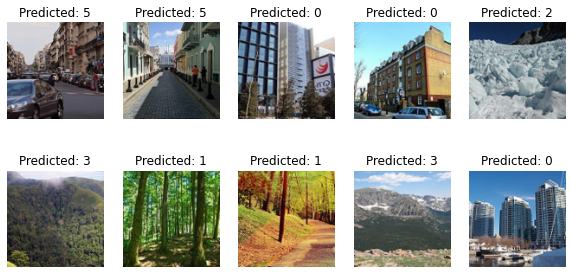

Epoch 2/10 - Training loss: 0.1934 - Training accuracy: 93.12%
69.44693899154663 seconds
Combined train accuracies: [0.9227509468793869, 0.9311947600408034]
Combined train losses: [0.2185522582043301, 0.1934127868407152]
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


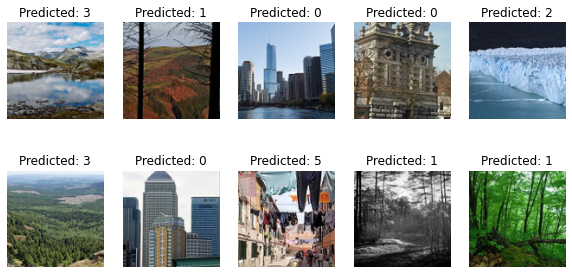

Epoch 3/10 - Training loss: 0.1803 - Training accuracy: 93.61%
69.34890723228455 seconds
Combined train accuracies: [0.9227509468793869, 0.9311947600408034, 0.9361032196066597]
Combined train losses: [0.2185522582043301, 0.1934127868407152, 0.18027465282516045]
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


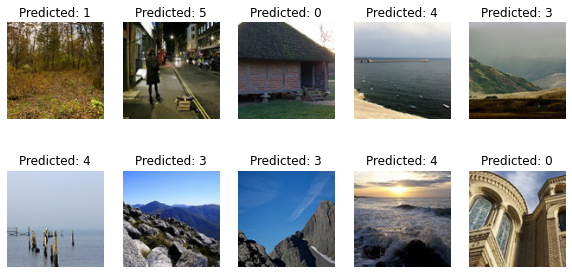

Epoch 4/10 - Training loss: 0.1562 - Training accuracy: 94.43%
69.05390167236328 seconds
Combined train accuracies: [0.9227509468793869, 0.9311947600408034, 0.9361032196066597, 0.9443023990501057]
Combined train losses: [0.2185522582043301, 0.1934127868407152, 0.18027465282516045, 0.15617266397245905]
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


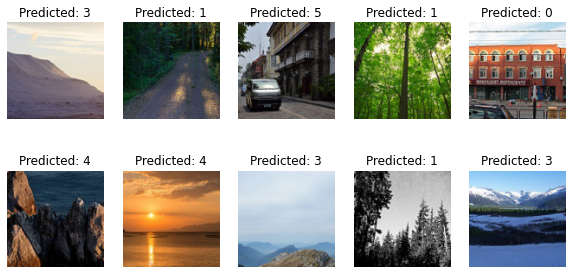

Epoch 5/10 - Training loss: 0.1596 - Training accuracy: 94.13%
68.56792068481445 seconds
Combined train accuracies: [0.9227509468793869, 0.9311947600408034, 0.9361032196066597, 0.9443023990501057, 0.9413352272727272]
Combined train losses: [0.2185522582043301, 0.1934127868407152, 0.18027465282516045, 0.15617266397245905, 0.1595995546741919]
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


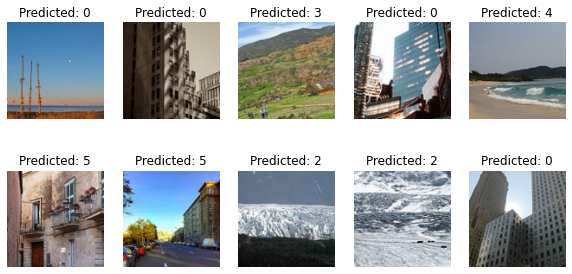

Epoch 6/10 - Training loss: 0.1362 - Training accuracy: 95.12%
68.68383169174194 seconds
Combined train accuracies: [0.9227509468793869, 0.9311947600408034, 0.9361032196066597, 0.9443023990501057, 0.9413352272727272, 0.9512389521707189]
Combined train losses: [0.2185522582043301, 0.1934127868407152, 0.18027465282516045, 0.15617266397245905, 0.1595995546741919, 0.13620162971995092]
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


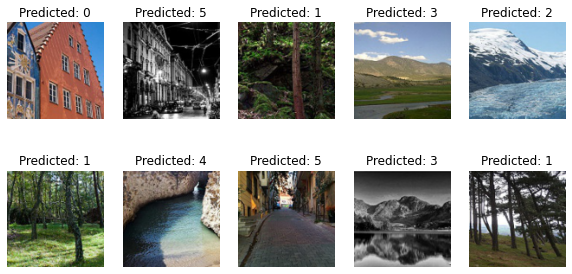

Epoch 7/10 - Training loss: 0.1190 - Training accuracy: 95.70%
68.63888311386108 seconds
Combined train accuracies: [0.9227509468793869, 0.9311947600408034, 0.9361032196066597, 0.9443023990501057, 0.9413352272727272, 0.9512389521707189, 0.9569602272727272]
Combined train losses: [0.2185522582043301, 0.1934127868407152, 0.18027465282516045, 0.15617266397245905, 0.1595995546741919, 0.13620162971995092, 0.11904412915041163]
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


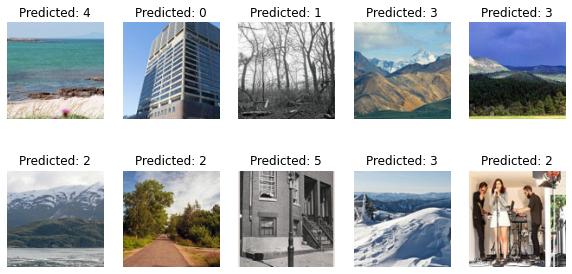

Epoch 8/10 - Training loss: 0.1212 - Training accuracy: 95.82%
68.80292201042175 seconds
Combined train accuracies: [0.9227509468793869, 0.9311947600408034, 0.9361032196066597, 0.9443023990501057, 0.9413352272727272, 0.9512389521707189, 0.9569602272727272, 0.9582307449795983]
Combined train losses: [0.2185522582043301, 0.1934127868407152, 0.18027465282516045, 0.15617266397245905, 0.1595995546741919, 0.13620162971995092, 0.11904412915041163, 0.12115980415520343]
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


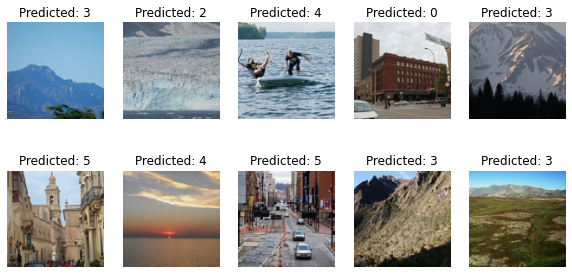

Epoch 9/10 - Training loss: 0.1069 - Training accuracy: 96.11%
68.66491365432739 seconds
Combined train accuracies: [0.9227509468793869, 0.9311947600408034, 0.9361032196066597, 0.9443023990501057, 0.9413352272727272, 0.9512389521707189, 0.9569602272727272, 0.9582307449795983, 0.9611426767977801]
Combined train losses: [0.2185522582043301, 0.1934127868407152, 0.18027465282516045, 0.15617266397245905, 0.1595995546741919, 0.13620162971995092, 0.11904412915041163, 0.12115980415520343, 0.10685951869553802]
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


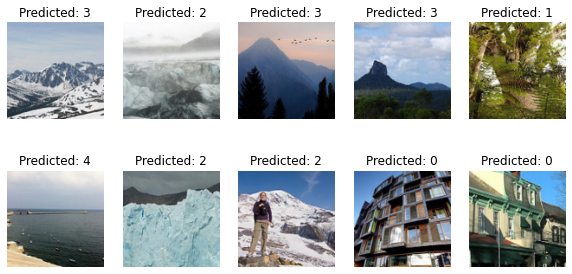

Epoch 10/10 - Training loss: 0.0977 - Training accuracy: 96.50%
68.85490107536316 seconds
Combined train accuracies: [0.9227509468793869, 0.9311947600408034, 0.9361032196066597, 0.9443023990501057, 0.9413352272727272, 0.9512389521707189, 0.9569602272727272, 0.9582307449795983, 0.9611426767977801, 0.9650173612616278]
Combined train losses: [0.2185522582043301, 0.1934127868407152, 0.18027465282516045, 0.15617266397245905, 0.1595995546741919, 0.13620162971995092, 0.11904412915041163, 0.12115980415520343, 0.10685951869553802, 0.09774614895947954]
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


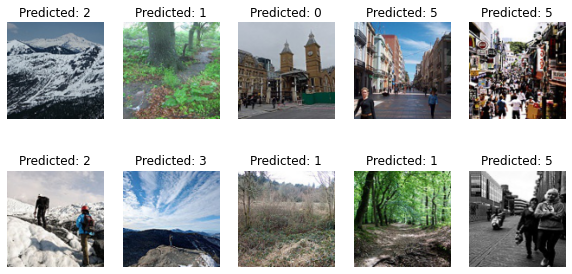

Total time taken:	690 seconds


In [12]:
combined_train_losses, combined_train_accs = [], []

total_time = 0

for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    train_losses = 0.0
    train_accs = 0.0
    avg_acc = 0.0
    t0=time.time()
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        accuracy = ((outputs.argmax(dim=1) == labels).float().mean())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Track the loss and accuracy
        train_losses += loss.item()
        train_accs += accuracy.item()

    # compute average loss
    avg_loss = train_losses/len(train_loader)
    avg_acc = train_accs/len(train_loader)

    # Print the progress for the epoch
    print(f"Epoch {epoch+1}/{num_epochs} - Training loss: {avg_loss:.4f} - Training accuracy: {avg_acc*100:.2f}%")
    print('{} seconds'.format(time.time() - t0))
    # Compute total computation time
    total_time += time.time() - t0

    # Add values in list
    combined_train_losses.append(avg_loss)
    combined_train_accs.append(avg_acc)

    ### Prediction
    print(train_dataset.classes)

    # Switch model to evaluation mode
    model.eval()
    
    # Get 10 random images from the training set
    indices = torch.randint(0, len(train_dataset), (10,)).tolist()
    data = [train_dataset[i] for i in indices]
    images = torch.stack([d[0] for d in data]).to(device)
    labels = torch.tensor([d[1] for d in data]).to(device)

    # Predict the labels for the images
    with torch.no_grad():
        outputs = model(images)
    predicted = torch.argmax(outputs, dim=1)

    fig, axs = plt.subplots(2, 5, figsize=(10, 5))
    for i in range(2):
        for j in range(5):
            index = i * 5 + j
            axs[i, j].imshow(images[index].cpu().permute(1, 2, 0))
            axs[i, j].set_title('Predicted: {}'.format(predicted[index]))
            axs[i, j].axis('off')
    plt.show()

print("Total time taken:\t{:.0f} seconds".format(total_time))


### Display the accuracy and loss evolution for the training set

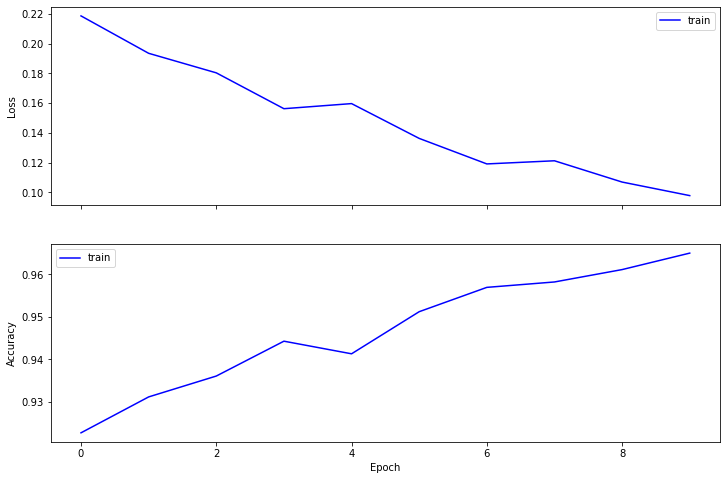

In [13]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8), sharex=True)
ax1.plot(combined_train_losses, color='b', label='train')
ax1.set_ylabel("Loss")
ax1.legend()
ax2.plot(combined_train_accs, color='b', label='train')
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epoch")
ax2.legend()

### Compute the validation accuracy and loss

In [14]:
test_accuracy, test_loss = 0, 0
with torch.no_grad():
    # Iterate through batches
    model.to("cpu")
    for data, label in eval_loader:
        # Forward pass
        test_output_i = model(data)
        test_loss_i = loss_fn(test_output_i, label)
        # Compute metrics
        acc = ((test_output_i.argmax(dim=1) == label).float().mean())
        test_accuracy += acc/len(eval_loader)
        test_loss += test_loss_i/len(eval_loader)

print("Validation loss: {:.4f}".format(test_loss))
print("Validation accuracy: {:.2f}%".format(test_accuracy*100))

Validation loss: 0.2466
Validation accuracy: 92.40%


### Make prediction on the evaluation set

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


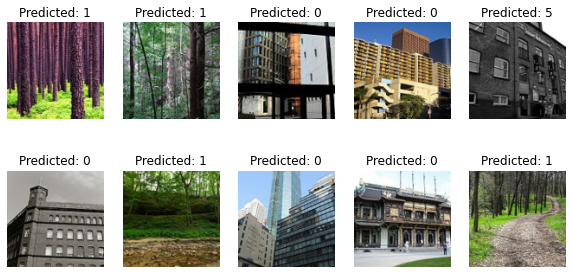

In [15]:
 ### Prediction
print(eval_dataset.classes)
# Switch model to evaluation mode
model.eval()
# Get 10 random images from the training set
indices = torch.randint(0, len(eval_dataset), (10,)).tolist()
data = [train_dataset[i] for i in indices]
images = torch.stack([d[0] for d in data])
labels = torch.tensor([d[1] for d in data])

# Predict the labels for the images
with torch.no_grad():
    outputs = model(images)
predicted = torch.argmax(outputs, dim=1)

fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        axs[i, j].imshow(images[index].permute(1, 2, 0))
        axs[i, j].set_title('Predicted: {}'.format(predicted[index]))
        axs[i, j].axis('off')
plt.show()

### Save model weights into dedicated folder

In [16]:
torch.save(model.state_dict(),'model3_weights(LabModel).pth')